In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random as rd
from sklearn.metrics import silhouette_score

In [2]:
dataset=pd.read_csv(r'F:\MS IIITH\course structure and syllabus\Semester I\Data Analytics\Project\reformed_datset.csv')


In [3]:
dataset.describe()

,Unnamed: 0,Unnamed: 0.1,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.00000
mean,9103.000000,9103.000000,214298.338606,25.122206,66.238699,71.307299,2.410696,0.009731,1597.809908,1.113222,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,4.19120
std,5256.052511,5256.052511,29965.244204,4.669943,6.908930,6.136496,5.594933,0.021999,272.586016,0.394031,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,10.70778
min,0.000000,0.000000,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,4551.500000,4551.500000,200315.500000,21.000000,62.000000,67.000000,0.300000,0.001000,1457.000000,1.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.39200
50%,9103.000000,9103.000000,221759.000000,25.000000,66.000000,71.000000,0.675000,0.003000,1635.000000,1.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.00000
75%,13654.500000,13654.500000,236529.500000,28.000000,71.000000,75.000000,2.000000,0.009000,1787.000000,1.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.00000
max,18206.000000,18206.000000,246620.000000,45.000000,94.000000,95.000000,118.500000,0.565000,2346.000000,5.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,228.10000


In [4]:
# let us begin with implementing k means for value and wage
dataset_considered=pd.DataFrame()
dataset_considered['Value']=dataset['Value']
dataset_considered['Wage']=dataset['Wage']

In [5]:
m=dataset_considered.shape[0] #number of training examples
n=dataset_considered.shape[1] #number of features. Here n=2

In [6]:
m

1000

In [7]:
n

2

In [8]:
n_iter=30 # total no of itterations for k to converge

In [9]:
K=10 # number of clusters( initial value )

In [10]:
#initialize centroids randomly from data points
Centroids = pd.DataFrame(index=range(n),columns=range(10))

In [11]:
Centroids.shape

(2, 10)

Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.( 2 x 5)

In [12]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids[i][0]=dataset_considered['Value'][rand]
    Centroids[i][1]=dataset_considered['Wage'][rand]

In [13]:
Centroids
# zeroth row is value
# first row is wage

,0,1,2,3,4,5,6,7,8,9
0,13.0,34.0,21.5,45.0,10.5,8.5,50.0,10.5,8.5,17.5
1,0.026,0.085,0.021,0.18,0.046,0.037,0.092,0.023,0.024,0.037


In [14]:
output= pd.DataFrame(index=range(len(dataset_considered)),columns=range(K))

In [17]:
def euclidean_distance():
    print("within elcid dist calculation ")
    # finding Euclidean distance between each point to all the centroids
    p=[0,0]
    q=[0,0]
    for i  in range(len(dataset_considered)):
        for j in range(K):
            #print(i)
            #print(j)
            #print("----------")
            p[0]=Centroids[j][0]
            p[1]=Centroids[j][1]
            q[0]=dataset_considered['Value'][i]
            q[1]=dataset_considered['Wage'][i]
            output[j][i]=math.dist(p,q)
    


In [20]:
# creating an empty list to store the clusters where the points need to be fit
cluster_seg=[None]*len(output)

In [21]:
def cluster_labels():
    print("within cluster label generation")
    # updating the cluster labels for points 
    for i in range(1,len(cluster_seg)+1):
        valset=output.iloc[i-1].to_list()
        cluster_seg[i-1]=valset.index(np.min(valset))
    

In [23]:
val_checker=pd.DataFrame(index=range(n+1),columns=range(K))

In [24]:
counter_value=np.zeros(K)

In [25]:
def centroid_updation(K):
    print("within centroid updation")
    sum_value=np.zeros(K)
    wage_value=np.zeros(K)
    counter_value=np.zeros(K)


    #updating the centroid value as per the points in the cluster
    for i in range(len(cluster_seg)):
        for j in range(K):  
            if cluster_seg[i]==j :
                sum_value[j]=sum_value[j]+dataset_considered['Value'][i]
                wage_value[j]=wage_value[j]+dataset_considered['Wage'][i]
                counter_value[j]=counter_value[j]+1


    for i in range(K):  
        for j in range(len(Centroids)):
                if j==0:
                    Centroids[i][j]=(sum_value[i]/counter_value[i]) #value for cluster in centroid
                else:
                    Centroids[i][j]=(wage_value[i]/counter_value[i])#wage for cluster 1 in centroid




In [28]:
def k_means(K):
    print("within kmeans calculation")
    for i in range(n_iter):
        print("itteration in k means")
        print(i)
        print("calling euclidean_distance")
        euclidean_distance()
        # creating an empty list to store the clusters where the points need to be fit
        cluster_seg=[None]*len(output)
        cluster_labels()
        centroid_updation(K)
    

In [30]:
#wcss calculation (elbow method) Within Cluster Sum of Squares (WCSS)
def wcss_calculation():
    print("within wcss_calculation ")
    wcss=0
    wcss_final=0
    distance=0
    counter=0
    v1=[0,0]
    v2=[0,0]
    

    for j in range(1):
        for i in range(len(cluster_seg)):
            if cluster_seg[i]==2:
                v1[0]=dataset_considered['Value'][i]
                v1[1]=dataset_considered['Wage'][i]
                v2[0]=Centroids[cluster_seg[i]][0]
                v2[1]=Centroids[cluster_seg[i]][1]
                distance=math.dist(v1,v2)
                distance=math.pow(distance,2)
                wcss=wcss+distance
                counter=counter+1
        if counter >0:        
            wcss=wcss/counter
        else:
            wcss=0
        wcss_final=wcss_final+wcss
        counter=0
        v1=[0,0]
        v2=[0,0]
        wcss=0
    wcss_final=wcss_final
    return  wcss_final
            

In [34]:

wcss_final_values=[]
silhouettescore_values=[]
for i in range(1,11):# loop is just to provide with the flexibility of doing calculations for multiple k values
    #print("calling k means for time")
    print(i)
    #print("kmeans called ")
    k_means(i)
    print("calling wcss_calculation")
    wcss_result=wcss_calculation()
    #print("wcss_result obtained for times:")
    #print(i)
    silhouettescore_values.append(silhouette_score(dataset_considered, cluster_seg))
    wcss_final_values.append(wcss_result)
    
    
    

1
within kmeans calculation
itteration in k means
0
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
1
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
2
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
3
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
4
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
5
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
6
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation

within cluster label generation
within centroid updation
itteration in k means
7
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
8
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
9
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
calling wcss_calculation
within wcss_calculation 
7
within kmeans calculation
itteration in k means
0
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
1
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
2
calling euclidean_distance
within elcid dist calculation 
within cluster label generation
within centroid updation
itteration in k means
3
calling

In [35]:
# the silhouettescore values for K=1 ,2,3,4,5,6,7,8,9,10 are as under
silhouettescore_values

[0.28151386005829737,
 0.28174167139517303,
 0.2868111714876412,
 0.2870625364201909,
 0.3970160591390798,
 0.5009924565312796,
 0.505824589332642,
 0.5202671113083313,
 0.529359709365208,
 0.5292515923417874]

In [36]:
wcss_final_values

[8.461596433566438,
 6.4708793333333325,
 4.572737801426452,
 4.463905137963228,
 4.463905137963228,
 4.463905137963228,
 6.12809866884214,
 8.100667120752984,
 8.391650772130177,
 5.721483756768014]

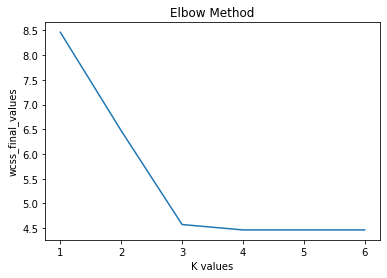

In [49]:


kmn=np.arange(1,7)

plt.plot(kmn,wcss_final_values[0:6] )
plt.title("Elbow Method")
plt.xlabel("K values")
plt.ylabel("wcss_final_values")
plt.show()